# Perkenalan

Nama  : Mustika Tri Utami

Program ini dibuat untuk melakukan analisis data penjualan buku di Amazon pada tahun 2009-2022

Link Tableau
https://public.tableau.com/app/profile/mustika.tri.utami/viz/Milestone1_17478187156380/Milestone1?publish=yes

# Problem Statement and Dataset Description

<h1></h1>

<h2>Topik Permasalahan</h2>
Analisis popularitas dan kualitas buku terlaris di Amazon berdasarkan genre, harga, dan tahun terbit.

<h2>Problem Statement</h2>
Perusahaan ingin meningkatkan efektivitas strategi penjualan buku sebesar 70%. Untuk menyusun strategi yang tepat, diperlukan analisis penjualan buku dalam beberapa tahun terakhir. Melalui analisis berbasis data, diharapkan perusahaan dapat memahami pasar lebih baik dan meningkatkan penjualan dalam jangka waktu minimal 6 bulan ke depan.

<h2>Latar Belakang</h2>
Amazon merupakan platform marketplace terbesar di dunia yang juga dimanfaatkan sebagai penjualan buku. Buku-buku terlaris dapat mencerminkan minat pasar dan strategi penjualan yang sukses. Dengan memahami tren penjualan, perusahaan dapat menganalisis pasar yang berguna untuk mengatur strategi bisnis dengan baik.

<h2>SMART</h2>
<ul>
    <li>Specific: Meningkatkan efektivitas strategi penjualan dengan mengidentifikasi genre paling laris berdasarkan data best selling Amazon tahun 2009-2021.</li>
    <li>Measurable: Meningkatkan penjualan genre yang diminati sebesar 70%</li>
    <li>Achievable: Dengan analisis data, perusahaan dapat menyusun strategi berbasis data yang relevan.</li>
    <li>Relevant: Analisis ini dapat membantu client untuk memahami pasar dan menyediakan produk yang diminati konsumen.</li>
    <li>Time-bound: Tujuan ini ditargetkan tercapai dalam waktu 6 bulan dengan memperbaiki strategi penjualan dan menyesuaikan produk yang akan dijual.</li>
</ul>

<h2>Sumber Dataset</h2>
Dataset penjualan buku ini saya dapatkan dari Kaggle https://www.kaggle.com/datasets/zwl1234/top-50-bestselling-novels-20092021-of-amazon/data <br>
Dataset 50 novel terlaris di Amazon diambil dari Amazon dengan mengambil data penjualan buku setiap tahun dari 2009 hingga 2021.

<h2>Penjabaran Masalah</h2>
<ol>
    <li> Bagaimana distribusi buku berdasarkan genre?</li>
    <li> Apakah buku fiksi cenderung memiliki rating lebih tinggi daripada rating buku non fiksi</li>
    <li>Bagaimana tren popularitas berdasarkan review dari tahun ke tahun?</li>
    <li>Apakah ada hubungan antara harga dan rating buku?</li>
    <li>Bagaimana sebaran data rating dan review?</li>
    <li>Apakah genre mempengaruhi rating atau hanya kebetulan?</li>
</ol>

<h2>Target Audience/User</h2>
Target audience merupakan penjual buku

# Data Loading

In [389]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind

In [390]:
df = pd.read_csv('P0M1_mustika_tri_dataset.csv')

In [391]:
df

,Name,Author,User Rating,Reviews,Price,Price_r,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,"17,350",$8.00,$8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,"2,052",$22.00,$22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,"18,979",$15.00,$15,2018,Non Fiction
3,1984,George Orwell,4.7,"70,425",$7.48,$8,2021,Fiction
4,1984 (Signet Classics),George Orwell,4.7,"21,424",$6.00,$6,2017,Fiction
...,...,...,...,...,...,...,...,...
645,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,"9,413",$8.00,$8,2019,Fiction
646,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,"14,331",$8.00,$8,2016,Non Fiction
647,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,"14,331",$8.00,$8,2017,Non Fiction
648,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,"14,331",$8.00,$8,2018,Non Fiction


# Data Cleaning

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         650 non-null    object 
 1   Author       650 non-null    object 
 2   User Rating  650 non-null    float64
 3   Reviews      650 non-null    object 
 4   Price        650 non-null    object 
 5   Price_r      650 non-null    object 
 6   Year         650 non-null    int64  
 7   Genre        650 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 40.8+ KB


In [393]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Price_r', 'Year',
       'Genre'],
      dtype='object')

In [394]:
df = df.drop('Price_r', axis=1)

In [395]:
df = df[df['Price'] != '$0.00']

In [396]:
df.columns = ['judul', 'penulis', 'rating', 'review', 'harga', 'tahun', 'genre']

In [397]:
df.review = df.review.str.replace(',', '')
df.harga = df.harga.str.replace('$','')

In [398]:
df.genre

0      Non Fiction
1          Fiction
2      Non Fiction
3          Fiction
4          Fiction
          ...     
645        Fiction
646    Non Fiction
647    Non Fiction
648    Non Fiction
649    Non Fiction
Name: genre, Length: 638, dtype: object

In [399]:
df.judul = df.judul.astype('string')
df.penulis = df.penulis.astype('string')
df.review = df.review.astype('int')
df.harga = df.harga.astype('float')
df.genre = df.genre.astype('string')

In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 638 entries, 0 to 649
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   judul    638 non-null    string 
 1   penulis  638 non-null    string 
 2   rating   638 non-null    float64
 3   review   638 non-null    int32  
 4   harga    638 non-null    float64
 5   tahun    638 non-null    int64  
 6   genre    638 non-null    string 
dtypes: float64(2), int32(1), int64(1), string(3)
memory usage: 37.4 KB


In [401]:
df.duplicated().sum()

0

In [402]:
df.to_csv('P0M1_mustika_tri_dataset_clean.csv', index=False)

# Exploration and Analysis

Bagian menyajikan proses eksplorasi dan analisis data penjualan buku terlaris di Amazon. Analisis ini merupakan proses untuk menjawab penjabaran masalah yang telah dipaparkan sebelumnya.

1. Distribusi buku berdasarkan genre (Visualisasi Data)

In [403]:
print(df['genre'].value_counts())

genre
Non Fiction    362
Fiction        276
Name: count, dtype: Int64


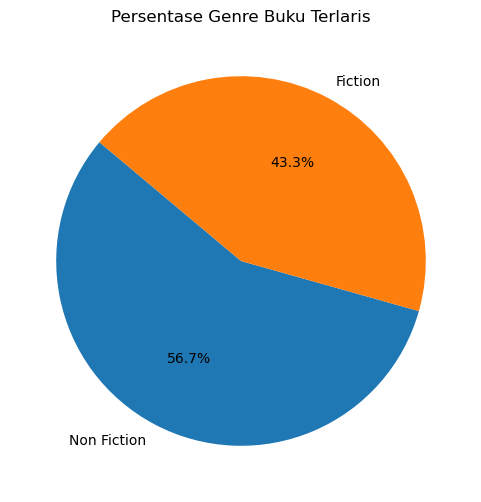

In [404]:
genre_counts = df['genre'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Genre Buku Terlaris')
plt.show()

In [405]:
fiksi = df[df['genre'] == 'Fiction']
nonfiksi = df[df['genre'] == 'Non Fiction']

In [406]:
buku_termahal = fiksi[fiksi['harga'] == fiksi['harga'].max()]
buku_termahal_non = nonfiksi[nonfiksi['harga'] == nonfiksi['harga'].max()]
print(buku_termahal)
print(buku_termahal_non)


                            judul          penulis  rating  review  harga  \
559  The Twilight Saga Collection  Stephenie Meyer     4.7    3801   82.0   

     tahun    genre  
559   2009  Fiction  
                                                judul  \
87  Diagnostic and Statistical Manual of Mental Di...   
88  Diagnostic and Statistical Manual of Mental Di...   

                             penulis  rating  review  harga  tahun  \
87  American Psychiatric Association     4.5    6679  105.0   2013   
88  American Psychiatric Association     4.5    6679  105.0   2014   

          genre  
87  Non Fiction  
88  Non Fiction  


In [407]:
rating_max = fiksi[fiksi['rating'] == fiksi['rating'].max()].iloc[0]
rating_max_non = nonfiksi[nonfiksi['rating'] == nonfiksi['rating'].max()].iloc[0]
print(rating_max)
print(rating_max_non)

judul      Big Shot (Diary of a Wimpy Kid
penulis                       Jeff Kinney
rating                                4.9
review                              19470
harga                                7.49
tahun                                2021
genre                             Fiction
Name: 45, dtype: object
judul      A Promised Land
penulis       Barack Obama
rating                 4.9
review               83212
harga                 23.0
tahun                 2020
genre          Non Fiction
Name: 13, dtype: object


In [408]:
review_max = fiksi[fiksi['review'] == fiksi['review'].max()]
review_max_non = nonfiksi[nonfiksi['review'] == nonfiksi['review'].max()]
print(review_max)
print(review_max_non)

                             judul    penulis  rating  review  harga  tahun  \
513  The Midnight Library: A Novel  Matt Haig     4.3  193482  13.29   2021   

       genre  
513  Fiction  
                                        judul          penulis  rating  \
421  The Boy, the Mole, the Fox and the Horse  Charlie Mackesy     4.8   

     review  harga  tahun        genre  
421  106658  10.35   2021  Non Fiction  


- Pada tahun 2009 hingga 2021, diketahui lebih banyak buku non fiksi yang masuk pada list best selling Amazon dengan buku non fiksi sebanyak 362 judul buku dan 276 buku fiksi.
- Dari 362 buku non fiksi, Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5 merupakan buku non fiksi dengan harga termahal, yaitu sebesar $105.0. Sedangkan untuk buku fiksi termahal yaitu  The Twilight Saga Collection seharga 82.0. Perbedaan harga sangat signifikan, karena buku non fiksi hanya ada satu buku sedangkan non fiksi merupakan judul koleksi yang berarti terdapat beberapa buku dalam satu judul tersebut.
- Untuk rating buku non fiksi tertinggi berada di nilai 4.9, salah satunya dipegang oleh buku A Promised Land yang ditulis oleh mantan presiden Amerika. Untuk buku fiksi rating tertinggi sama, berada di nilai 4.9 yang salah satunya diperoleh oleh buku Big Shot (Diary of a Wimpy Kid) oleh Jeff Kinney.
- The Boy, the Mole, the Fox and the Horse merupakan buku non fiksi yang paling banyak di review, yaitu sebanyak 106.658 kali. Sedangkan The Midnight Library: A Novel merupkana buku fiksi yang paling banyak di review dengan 193.482 kali review. Jumlah review fiksi lebih tinggi daripada review buku non fiksi.

2. Tingkat kecenderungan rating buku terhadap genre (Visualisasi Data)

In [409]:
rerata = df.groupby('genre')['rating'].mean().round(2)
print(rerata)

genre
Fiction        4.66
Non Fiction    4.62
Name: rating, dtype: float64


In [410]:
maxi = df.groupby('genre')['rating'].max()
print(maxi)

genre
Fiction        4.9
Non Fiction    4.9
Name: rating, dtype: float64


In [411]:
mini = df.groupby('genre')['rating'].min()
print(mini)

genre
Fiction        3.3
Non Fiction    4.0
Name: rating, dtype: float64


In [412]:
median = df.groupby('genre')['rating'].median()
print(median)

genre
Fiction        4.7
Non Fiction    4.6
Name: rating, dtype: float64


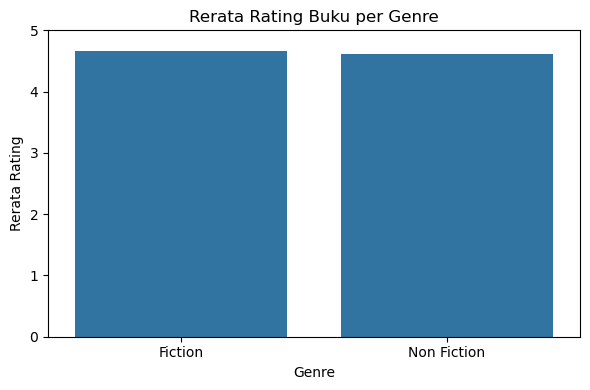

In [413]:
plt.figure(figsize=(6, 4))
sns.barplot(x=rerata.index, y=rerata.values)
plt.title('Rerata Rating Buku per Genre')
plt.xlabel('Genre')
plt.ylabel('Rerata Rating')
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

- Rata-rata rating buku fiksi dan non fiksi hampir sama, hanya selisih 0.04 dengan rating fiksi yang lebih tinggi. Rating buku fiksi yaitu 4.66 sedangkan non fiksi rata-ratanya sebesar 4.62
- Kedua genre tersebut memiliki rating tertinggi yang sama yaitu sebesar 4.9.
- Untuk rating terendah, buku fiksi memiliki rating 3.3 sedakan buku non fiksi rating terendahnya bernilai 4.0, dalam hal ini buku non fiksi lebih memuaskan daripada buku fiksi.
- Median rating buku fiksi yaitu 4.7, dengan rating tertinggi 4,9 dan terendah 3,3 ini berarti terdapat persebaran nilai yang lebar di bawah nilai median ini dan banyak buku dengan rating di atas median. Sedangkan median buku non fiksi yaitu 4.6 yang mana angka ini lebih rendah daripada median buku fiksi.

3. Jumlah review berdasarkan tahun (Visualisasi Data)

In [414]:
total_review = df.groupby('tahun')['review'].sum().sort_index()
print(total_review)

tahun
2009     235506
2010     271859
2011     400536
2012     654546
2013     621861
2014     760259
2015     685435
2016     680792
2017     638584
2018     696521
2019     794917
2020    1790733
2021    2818117
Name: review, dtype: int32


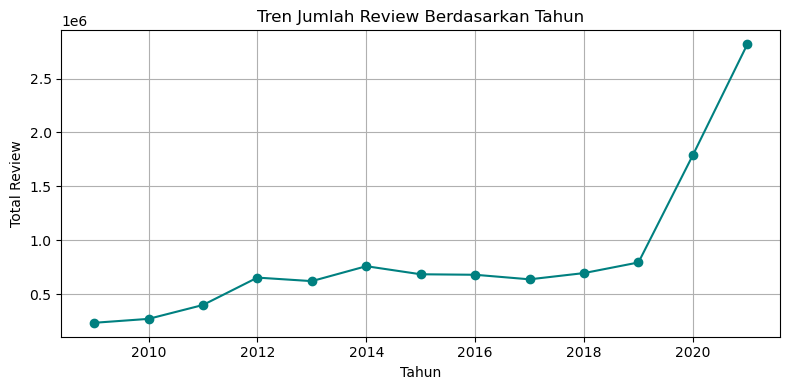

In [415]:
plt.figure(figsize=(8, 4))
plt.plot(total_review.index, total_review.values, marker='o', linestyle='-', color='teal')
plt.title('Tren Jumlah Review Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Review')
plt.grid(True)
plt.tight_layout()
plt.show()

- Tren banyaknya review pada tahun 2009-2019 cukup stabil meski ada kenaikan atau penurunan tiap tahunnya.
- Tren review konsumen naik signifikan pada tahun 2020 dan 2021. Pada tahun ini kemungkinan konsumen mulai berpindah ke platform online untuk membeli buku karena adanya pandemi COVID-19

4. Hubungan antara harga dan rating (Visualisasi Data)

In [416]:
corr_rho, pval_s = stats.spearmanr(df['harga'], df['rating'])

print(f"rho-correlation: {corr_rho:.2f}")
print(f"p-value: {pval_s}")

rho-correlation: -0.22
p-value: 2.1851076115972604e-08


If p-value more than 0.05, so the correlation between two variables is by chance.

In [417]:
if pval_s > 0.05:
    print('By chance')

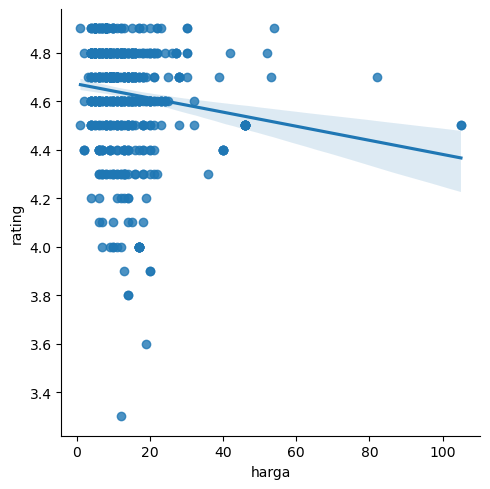

In [418]:
sns.lmplot(data=df, x = 'harga', y = 'rating')

In [419]:
print(f"Skewness: {df['harga'].skew()}")

Skewness: 3.9593191057530333


In [420]:
q1 = df['harga'].quantile(0.25)
q3 = df['harga'].quantile(0.75)
iqr = q3 - q1

up_bound = q3 + 1.5 * iqr
low_bound = q1 - 1.5 * iqr

print(f'Upper Boundary: {up_bound:.2f}')
print(f'Lower Boundary: {low_bound:.2f}')

Upper Boundary: 27.00
Lower Boundary: -5.00


In [421]:
outlier = df['harga'][(df['harga']<low_bound) | (df['harga']>up_bound)]
no_outlier = df['harga'][(df['harga']>=low_bound) & (df['harga']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(df["harga"]):.2f}%%')

Percentage of outliers: 5.80%%


<Axes: >

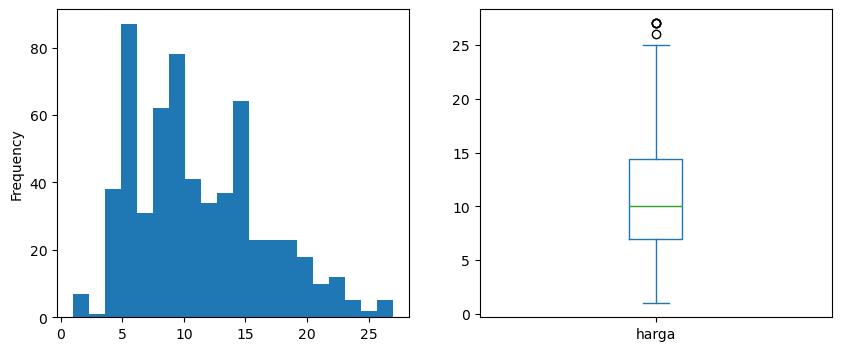

In [422]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

no_outlier.plot(kind='hist',bins=20,ax=ax[0])
no_outlier.plot(kind='box',ax=ax[1])

In [423]:
df_no_outlier = df[df['harga'] < 27.00]

In [424]:
corr_r, pval_p = stats.pearsonr(df_no_outlier['harga'], df_no_outlier['rating'])
print(f"r-correlation: {corr_r:.2f}, p-value: {pval_p}")

r-correlation: -0.20, p-value: 8.615773966609517e-07


In [425]:
if pval_p > 0.05:
    print('By chance')

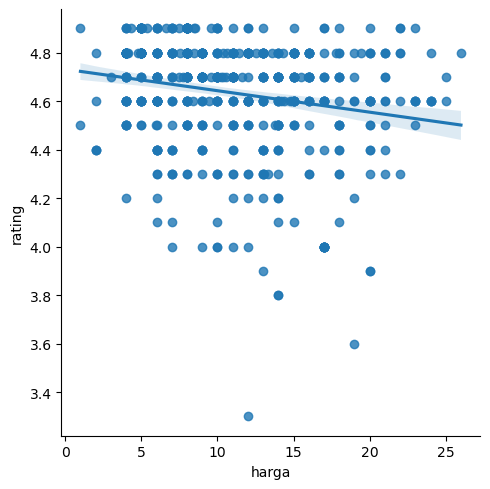

In [426]:
sns.lmplot(data=df_no_outlier, x = 'harga', y = 'rating')

- Data dengan outlier menunjukkan tren negatif di mana semakin tinggi harga suatu buku, semakin rendah rating yang di dapat. Berdasarkan p-value data ini, hubungan keduanya bukan suatu kebetulan.
- Untuk data yang telah dibersihkan outlier harga, juga memiliki tren negatif. P value juga kurang dari 0.05 yang mana berarti hubungan keduanya bukan suatu kebetulan.
- Dari kedua data, baik yang terdapat outlier maupun tanpa outlier, tren harga dengan rating bernilai negatif, dan bukan suatu kebetulan, harga memang berpengaruh terhadap rating.

5. Sebaran data rating dan review (Statistik Deskriptif)

In [427]:
print(f"rho-correlation: {df['rating'].corr(df['review'], method='spearman'):.2f}")

rho-correlation: 0.24


In [428]:
stats_summary = df[['rating', 'review']].describe().round(2)
print(stats_summary)

       rating     review
count  638.00     638.00
mean     4.63   17319.23
std      0.22   20840.27
min      3.30      37.00
25%      4.50    4873.50
50%      4.70   10009.00
75%      4.80   22288.00
max      4.90  193482.00


In [429]:
median = df[['rating', 'review']].median()
print(median)

rating        4.7
review    10009.0
dtype: float64


In [430]:
modus = df[['rating', 'review']].mode()
print(modus)

   rating  review
0     4.8    8580


In [431]:
skew = df[['rating', 'review']].skew().round(2)
print(skew)

rating   -1.54
review    3.10
dtype: float64


In [432]:
kurt = df[['rating', 'review']].kurt().round(2)
print(kurt)

rating     3.61
review    14.14
dtype: float64


- Rata-rata, median, dan modus rating adalah 4.63, 4.70, dan 4.8. Nilai ini menunjukkan rating cenderung tinggi dan distribusi data condong ke kanan.
- Standar deviasi rating sebesar 0.22 menunjukkan bahwa variasi antar rating relatif kecil. Rating minimum yaitu 3.30 tetapi sebagian besar buku memiliki rating di atas 4.5.
- Skewness rating yaitu -1.54, menunjukkan distribusi miring ke kiri, artinya sebagian buku memiliki rating tinggi, dengan beberapa buku memiliki rating lebih rendah.
- Kurtosis rating yaitu 3.61, menunjukkan distribusi dengan ekor yang lebih tebal dibandingkan distribusi normal. Ini berarti ada beberapa outlier, tetapi distribusi tetap cenderung terpusat pada nilai tinggi.
- Rata-rata jumlah review yaitu 17,319.23 tetapi median hanya 10,009 dan modus 8,580. Hal ini menunjukkan bahwa distribusi data tidak merata, dengan beberapa buku memiliki ulasan yang jauh lebih tinggi dari rata-rata.
- Tingginya standar deviasi review menunjukka variasi signifikan pada jumlah review. Data ini sangat tersebar dan mencakup rentang review yang luas.
- Skewness riview sebesar 3.10 menunjukkan distribusi miring ke kanan. Artinya sebagian besar buku memiliki review dalam jumlah yang lebih sedikit, dengan beberapa produk memiliki jumlah ulasan yang besar.
- Kurtosis review yaitu 14.14, menunjukkan distribusi dengan ekor yang tebal.

6. Hubungan antara genre dengan rating (Statistik Inferensial)

H0: Genre tidak memengaruhi rating buku<br>
H1: Genre memengaruhi rating buku

In [433]:
contingency_table = pd.crosstab(df['genre'],df['rating'])
contingency_table

rating,3.3,3.6,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9
genre,,,,,,,,,,,,,,
Fiction,1,1,2,3,6,4,3,13,11,23,33,40,84,52
Non Fiction,0,0,0,0,9,2,5,16,28,42,80,88,76,16


In [434]:
res = stats.chi2_contingency(contingency_table)
p_val = res.pvalue
print("P-value:",p_val)

P-value: 1.3888835051255835e-09


In [435]:
if p_val < 0.05:
    print('H0 rejected')

H0 rejected


Dari perhitungan menggunakan Chi-Squared Test, diketahui bahwa terdapat hubungan antara genre dengan rating buku. Hal ini dapat menjadi pertimbangan dalam menentukan pilihan genre yang akan dijual.

# Conclusion

Berdasarkan analisis yang dilakukan terhadap data buku best selling antara genre fiksi dan non fiksi pada tahun 2009 hingga 2021, terdapat beberapa temuan yang dapat menjadi pertimbangan strategis untuk menentukan pilihan genre yang akan dijual. Secara umum, buku non fiksi lebih sering muncul dalam barisan buku terlaris meskipun rata-rata harga buku non fiksi lebih tinggi.

Buku non fiksi cenderung memiliki rating yang lebih tinggi daripada rating buku fiksi, hal ini dikarenakan nilai terendah rating buku fiksi yaitu 3.3 sedangkan buku non fiksi rating terendahnya 4.0. Tren jumlah review mengalami peningkatan signifikan pada tahun 2020 dan 2021. Kemungkinan hal ini terjadi karena adanya pandemi COVID-19 sehingga banyak konsumen baru yang membeli buku melalui Amazon.

Sebagai rekomendasi, penjual sebaiknya memerhatikan genre yang akan dijual, harga dan kualitas saat melakukan perencanaan strategis.